# Bonus Question A
Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from posts import find_avg_post_time
import matplotlib.ticker as ticker

In [2]:
profiles = pd.read_csv('data/instagram_profiles.csv', sep='\t', usecols=['profile_id', 'followers'])
profiles = profiles[profiles.followers.notnull()]
profiles.profile_id = profiles.profile_id.astype('Int64')
profiles = profiles.drop_duplicates(subset='profile_id', keep="last")
profiles = profiles.sort_values(by='followers', ascending=False)

In [3]:
posts = pd.read_csv('data/instagram_posts.csv', sep='\t', usecols=['profile_id', 'cts'], parse_dates=['cts'], index_col=False)

In [6]:
profiles = find_avg_post_time(posts, profiles)

C:\Users\Jonas\Desktop\Uni\MSc\Year 1\ADM\homework_2\adm-2022-hw-2\posts\publishing.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profiles_with_posts['true_n_posts'] = sorted_posts.groupby('profile_id')['profile_id'].count().values
C:\Users\Jonas\Desktop\Uni\MSc\Year 1\ADM\homework_2\adm-2022-hw-2\posts\publishing.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profiles_with_posts['start_index'] = profiles_with_posts.true_n_posts.shift(1).cumsum().astype('Int64')
C:\Users\Jonas\Desktop\Uni\MSc\Y

In [7]:
top_rows = round(len(profiles) * 0.1)
top = profiles.iloc[:top_rows, :]
bottom = profiles.iloc[top_rows:, :]

In [8]:
top_delta_avg = top.avg_post_delta.mean().total_seconds()
bottom_delta_avg = bottom.avg_post_delta.mean().total_seconds()

## Plot
One might assume that more popular profiles (those with more followers) post **more** frequently than less popular profiles. However, this plot shows that the top 10 percent of profiles post **less** frequent than the bottom 90 percent of profiles. Though this could also be due to the fact that the dataset is incomplete with respect to the posts from the popular profiles.

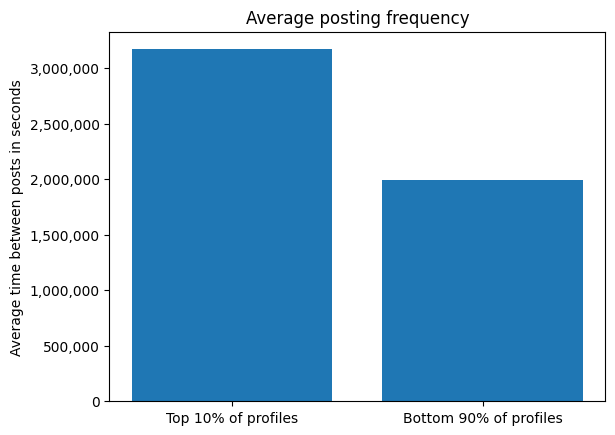

In [9]:
plt.bar(x=['Top 10% of profiles', 'Bottom 90% of profiles'], height=[top_delta_avg, bottom_delta_avg])
plt.title('Average posting frequency')
plt.ylabel('Average time between posts in seconds')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))